In [1]:
# importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Building cosine wave dataset

x = 0.1*np.arange(1000)
data = np.cos(x)

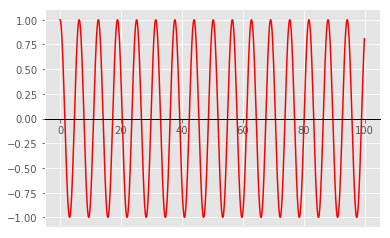

In [3]:
# Ploting cosine wave with generated dataset 

plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xlim(0,100,auto=True)

plt.plot(x,data, 'r')

plt.show()

In [4]:
# Scaling down the raw data with StandardScaler()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [5]:
data_scaled = data_scaled.flatten()

In [6]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-150]

In [7]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-(150+20):]

In [8]:
# Preparing the training dataset for LSTM input 

T = 20
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (830, 20, 1) Y.Shape: (830,)


In [9]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 20
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)

X_test.Shape: (150, 20, 1) Y_test.Shape: (150,)


In [10]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (664, 20, 1) x_test.shape: (166, 20, 1) y_train.shape: (664,) y_test.shape: (166,)


In [11]:
# Building LSTM model 

model = keras.Sequential()
model.add(keras.layers.LSTM((50), batch_input_shape=(None,20,1), activation='elu', return_sequences=True))
model.add(keras.layers.LSTM((1), activation='selu', return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

W0724 14:41:56.090538  4220 deprecation.py:506] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0724 14:41:56.340872  4220 deprecation.py:323] From C:\Users\22458147\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4075: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 208       
Total params: 10,608
Trainable params: 10,608
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fitting splitted dataset into the model

r = model.fit(x_train.reshape(664,20,1), y_train, epochs=20, validation_data=(x_test.reshape(166,20,1), y_test))

Train on 664 samples, validate on 166 samples
Epoch 1/20
664/664 [==============================] - 2s 3ms/sample - loss: 1.0170 - acc: 0.0000e+00 - val_loss: 0.9266 - val_acc: 0.0000e+00
Epoch 2/20
664/664 [==============================] - 1s 1ms/sample - loss: 0.8252 - acc: 0.0000e+00 - val_loss: 0.7984 - val_acc: 0.0000e+00
Epoch 3/20
664/664 [==============================] - 1s 1ms/sample - loss: 0.7178 - acc: 0.0000e+00 - val_loss: 0.6678 - val_acc: 0.0000e+00
Epoch 4/20
664/664 [==============================] - 1s 1ms/sample - loss: 0.5382 - acc: 0.0000e+00 - val_loss: 0.4514 - val_acc: 0.0000e+00
Epoch 5/20
664/664 [==============================] - 1s 1ms/sample - loss: 0.3414 - acc: 0.0000e+00 - val_loss: 0.2672 - val_acc: 0.0000e+00
Epoch 6/20
664/664 [==============================] - 1s 1ms/sample - loss: 0.1502 - acc: 0.0000e+00 - val_loss: 0.0590 - val_acc: 0.0000e+00
Epoch 7/20
664/664 [==============================] - 1s 1ms/sample - loss: 0.0694 - acc: 0.0000e+00 -

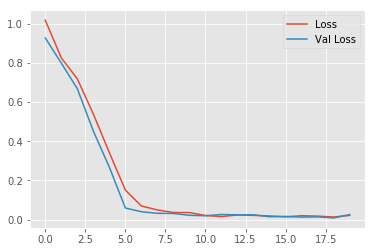

In [14]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = 6,4

In [15]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(166,20,1))

In [16]:
# reversing predicted y_test values 

scaler.inverse_transform(result).flatten()

array([ 0.743761  ,  0.8030147 ,  0.85422426,  0.8949882 ,  0.9267999 ,
        0.94836617,  0.95971626,  0.9626708 ,  0.95795774,  0.9469498 ,
        0.9298578 ,  0.9037085 ,  0.86777496,  0.82231665,  0.76747316,
        0.70388734,  0.63306344,  0.5571334 ,  0.47843498,  0.39922833,
        0.3212616 ,  0.23588546,  0.14917044,  0.05623451, -0.03942462,
       -0.168162  , -0.27260363, -0.37226668, -0.47325966, -0.5594051 ,
       -0.647254  , -0.72275966, -0.79147786, -0.84840286, -0.89796364,
       -0.9371843 , -0.96776336, -0.989574  , -1.0021312 , -1.0050209 ,
       -0.9979792 , -0.9805938 , -0.95271677, -0.9141364 , -0.86508036,
       -0.8059537 , -0.7377318 , -0.6623531 , -0.58236516, -0.5004045 ,
       -0.4181528 , -0.33393887, -0.23771568, -0.12779321,  0.00375308,
        0.08731575,  0.17690824,  0.26260355,  0.35556403,  0.44337678,
        0.53174716,  0.61232036,  0.68750656,  0.7541806 ,  0.81240225,
        0.8616041 ,  0.90119773,  0.93094087,  0.9512777 ,  0.96

In [17]:
# look into original y_test values

scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

array([ 0.75506808,  0.8167513 ,  0.87027382,  0.91510085,  0.95078449,
        0.97696821,  0.99339038,  0.99988693,  0.99639293,  0.98294331,
        0.95967244,  0.92681285,  0.88469284,  0.83373328,  0.77444333,
        0.7074154 ,  0.6333192 ,  0.55289509,  0.46694664,  0.37633261,
        0.28195839,  0.18476693,  0.08572935, -0.01416482, -0.11391746,
       -0.21253187, -0.30902273, -0.40242594, -0.49180824, -0.57627656,
       -0.65498691, -0.72715285, -0.79205332, -0.84903985, -0.89754306,
       -0.93707831, -0.96725059, -0.98775842, -0.99839689, -0.99905971,
       -0.98974026, -0.97053165, -0.94162581, -0.90331156, -0.85597171,
       -0.80007928, -0.73619272, -0.66495036, -0.58706405, -0.50331198,
       -0.41453098, -0.32160813, -0.22547188, -0.12708278, -0.02742392,
        0.07250895,  0.17171734,  0.26920999,  0.36401278,  0.45517847,
        0.54179617,  0.62300042,  0.69797986,  0.76598531,  0.82633729,
        0.87843279,  0.92175127,  0.95585992,  0.98041793,  0.99

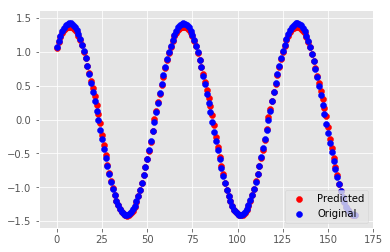

In [18]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.scatter(range(166), result, c='r', label="Predicted")
plt.scatter(range(166),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

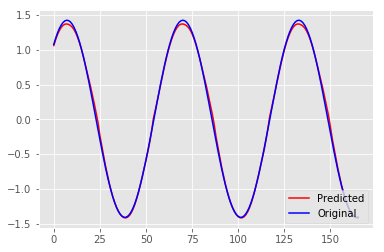

In [19]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [20]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [21]:
result_01

array([-1.4005533 , -1.3710647 , -1.3263543 , -1.2666669 , -1.1922466 ,
       -1.1039026 , -1.0034479 , -0.89399445, -0.77928597, -0.662912  ,
       -0.54598075, -0.42357367, -0.2736798 , -0.11704317,  0.05208036,
        0.17250791,  0.2975459 ,  0.4223898 ,  0.55279416,  0.67732096,
        0.80072874,  0.91124284,  1.0159576 ,  1.1045916 ,  1.1844839 ,
        1.2480745 ,  1.300778  ,  1.3371633 ,  1.3612521 ,  1.3709979 ,
        1.3688037 ,  1.3576488 ,  1.3382214 ,  1.3078694 ,  1.263777  ,
        1.2060138 ,  1.1348342 ,  1.0506914 ,  0.95505023,  0.8506672 ,
        0.74063194,  0.62838686,  0.5167608 ,  0.40754208,  0.2778883 ,
        0.14966796,  0.02653509, -0.14539988, -0.30923113, -0.44576886,
       -0.5961833 , -0.7271149 , -0.84722304, -0.9668769 , -1.0654833 ,
       -1.1577475 , -1.2326658 , -1.2947781 , -1.3444498 , -1.3814975 ,
       -1.4057837 , -1.4169483 , -1.4140115 , -1.3966023 , -1.3646129 ,
       -1.3173621 , -1.255172  , -1.1783351 , -1.0877819 , -0.98

In [22]:
# look into original Y_test values

scaler.inverse_transform(Y_test.reshape(-1,1)).flatten()

array([-0.98437664, -0.96188063, -0.92977382, -0.88837702, -0.83810385,
       -0.77945663, -0.71302133, -0.63946176, -0.55951289, -0.47397356,
       -0.38369844, -0.28958954, -0.19258715, -0.09366049,  0.00620199,
        0.1060025 ,  0.20474387,  0.30143951,  0.39512326,  0.48485907,
        0.56975033,  0.64894884,  0.72166326,  0.78716706,  0.84480575,
        0.89400342,  0.9342685 ,  0.96519868,  0.98648491,  0.99791451,
        0.99937328,  0.99084665,  0.9724198 ,  0.94427685,  0.906699  ,
        0.86006172,  0.80483098,  0.74155864,  0.67087688,  0.59349195,
        0.51017704,  0.42176462,  0.32913806,  0.23322286,  0.13497737,
        0.03538324, -0.06456443, -0.163867  , -0.26153226, -0.35658437,
       -0.44807362, -0.53508586, -0.61675169, -0.69225515, -0.76084183,
       -0.82182642, -0.8745996 , -0.91863407, -0.95348985, -0.97881867,
       -0.99436746, -0.99998086, -0.99560278, -0.98127697, -0.95714656,
       -0.92345266, -0.88053193, -0.82881321, -0.76881327, -0.70

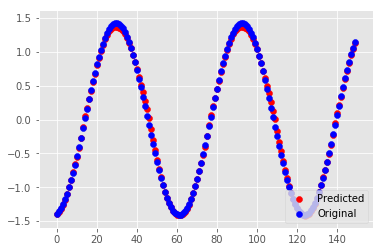

In [23]:
# Plotting Y_test and predicted Y_test 

plt.style.use('ggplot')
plt.scatter(range(150), result_01, c='r', label="Predicted")
plt.scatter(range(150),Y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

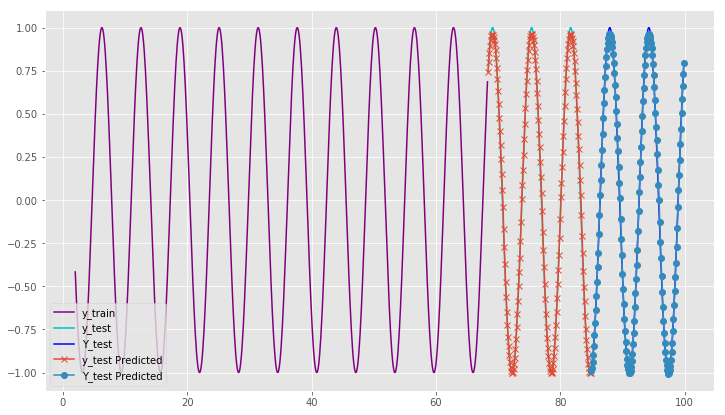

In [25]:
# Plotting y_train, predicted y_test and predicted Y_test (with original values)

x = 0.1*np.arange(1000)

fig, ax1 = plt.subplots()
ax1.plot(x[20:-150][:664], scaler.inverse_transform(y_train.reshape(-1,1)).flatten(), c='purple', label='y_train')
ax1.plot(x[20:-150][664:], scaler.inverse_transform(y_test.reshape(-1,1)).flatten(), 'c-', label='y_test')
ax1.plot(x[850:], scaler.inverse_transform(Y_test.reshape(-1,1)).flatten(), 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], scaler.inverse_transform(result.reshape(-1,1)).flatten(), 'x-', label='y_test Predicted')
ax1.plot(x[850:], scaler.inverse_transform(result_01.reshape(-1,1)).flatten(), 'o-', label='Y_test Predicted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

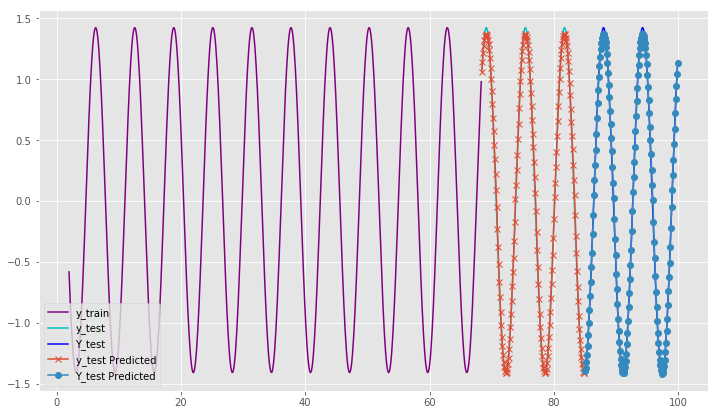

In [26]:
# Plotting y_train, y_test, Y_test, predicted y_test and predicted Y_test (with scaled values)

fig, ax1 = plt.subplots()

ax1.plot(x[20:-150][:664], y_train, c='purple', label='y_train')
ax1.plot(x[20:-150][664:], y_test, 'c-', label='y_test')
ax1.plot(x[850:], Y_test, 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], result, 'x-', label='y_test Predicted')
ax1.plot(x[850:], result_01, 'o-', label='Y_test Predicted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

In [27]:
# Look into the future 

validation_target = Y_test
validation_predictions = []

# first validation input

last_x = X_test[0] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [28]:
# z is used to look beyond 1000 data points, it is consist of 1500 data points, means 500 points will be predicted by LSTM model    
z= np.concatenate((x, 0.1*np.arange(1000,1500)), axis=None)

In [29]:
# Look into the future from 1000 to 1500 points

future_predictions = []

# first validation input
last_x = X_test[-1] 

while len(future_predictions) < 500:
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] 
  future_predictions.append(p)  
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [30]:
len(future_predictions)

500

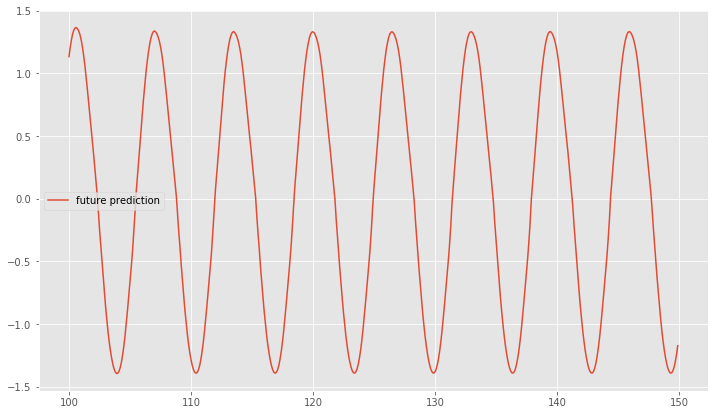

In [31]:
# with scaled values future prediction from 1000 to 1500 points

plt.plot(z[1000:1500],(future_predictions), label='future prediction')
plt.legend()

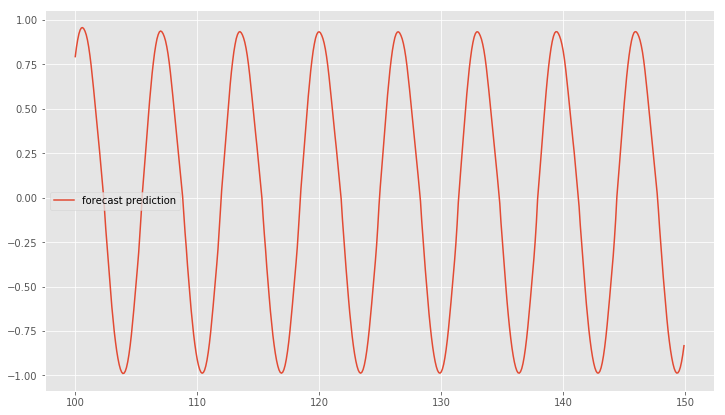

In [32]:
# with original values future prediction from 1000 to 1500 points

plt.plot(z[1000:1500],scaler.inverse_transform(np.array([future_predictions]).reshape(-1,1)).flatten(), label='forecast prediction')
plt.legend()

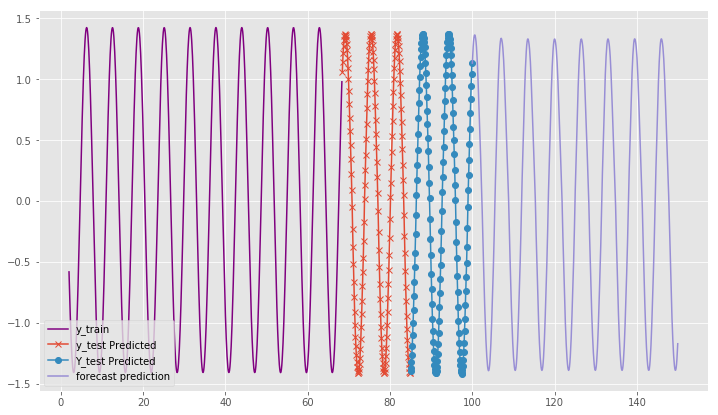

In [33]:
# Plotting y_train, predicted y_test, predicted Y_test and predicted future (with scaled values)

fig, ax1 = plt.subplots()

ax1.plot(z[20:-150][0:664], y_train, c='purple', label='y_train')
# ax1.plot(z[20:-150][664:830], y_test, 'c-', label='y_test')
# ax1.plot(z[850:1000], Y_test, 'b-', label='Y_test')
ax1.plot(z[20:-150][664:830], result, 'x-', label='y_test Predicted')
ax1.plot(z[850:1000], result_01, 'o-', label='Y_test Predicted')

plt.plot(z[1000:1500],future_predictions, label='forecast prediction')


ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

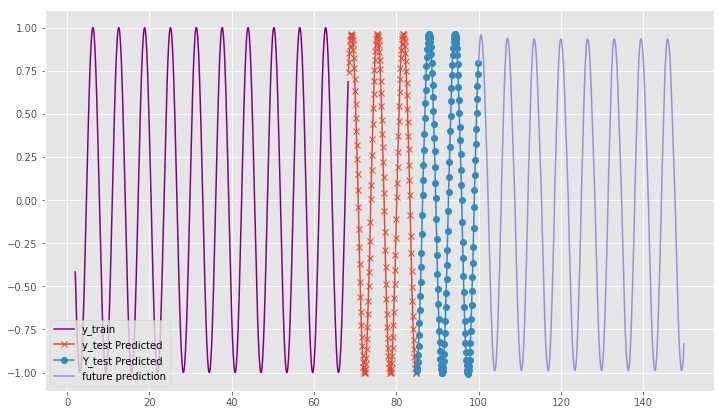

In [34]:
# Plotting y_train, predicted y_test, predicted Y_test and predicted future (with original values)

fig, ax1 = plt.subplots()

ax1.plot(z[20:-150][0:664], scaler.inverse_transform(y_train.reshape(-1,1)).flatten(), c='purple', label='y_train')
# ax1.plot(z[20:-150][664:830], scaler.inverse_transform(y_test.reshape(-1,1)).flatten(), 'c-', label='y_test')
# ax1.plot(z[850:1000], scaler.inverse_transform(Y_test.reshape(-1,1)).flatten(), 'b-', label='Y_test')
ax1.plot(z[20:-150][664:830], scaler.inverse_transform(result.reshape(-1,1)).flatten(), 'x-', label='y_test Predicted')
ax1.plot(z[850:1000], scaler.inverse_transform(result_01.reshape(-1,1)).flatten(), 'o-', label='Y_test Predicted')

plt.plot(z[1000:1500],scaler.inverse_transform(np.array([future_predictions]).reshape(-1,1)).flatten(), label='future prediction')


ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

In [35]:
# Look into the future from 1000 to 2000 points

future_predictions = []

# first validation input
last_x = X_test[-1] 

while len(future_predictions) < 1000:
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] 
  future_predictions.append(p)  
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [36]:
len(future_predictions)

1000

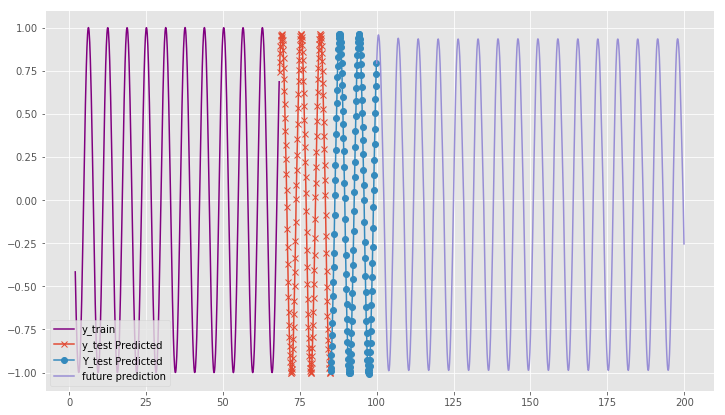

In [37]:
# Plotting y_train, predicted y_test, predicted Y_test and predicted future (with original values)

z= np.concatenate((x, 0.1*np.arange(1000,2000)), axis=None)
fig, ax1 = plt.subplots()

ax1.plot(z[20:-150][0:664], scaler.inverse_transform(y_train.reshape(-1,1)).flatten(), c='purple', label='y_train')
# ax1.plot(z[20:-150][664:830], scaler.inverse_transform(y_test.reshape(-1,1)).flatten(), 'c-', label='y_test')
# ax1.plot(z[850:1000], scaler.inverse_transform(Y_test.reshape(-1,1)).flatten(), 'b-', label='Y_test')
ax1.plot(z[20:-150][664:830], scaler.inverse_transform(result.reshape(-1,1)).flatten(), 'x-', label='y_test Predicted')
ax1.plot(z[850:1000], scaler.inverse_transform(result_01.reshape(-1,1)).flatten(), 'o-', label='Y_test Predicted')

plt.plot(z[1000:2000],scaler.inverse_transform(np.array([future_predictions]).reshape(-1,1)).flatten(), label='future prediction')


ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7